In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

In [60]:
data_GNN = '/content/drive/MyDrive/Thesis_5_1/data/nodes-embedding-GNN-GraphSAGE.csv'
data_GCN_2 = '/content/drive/MyDrive/Thesis_5_1/data/nodes-embedding-GCN.csv'
data_GCN_3 = '/content/drive/MyDrive/Thesis_5_1/data/nodes-embedding-GCN-3-layer.csv'

df_gnn = pd.read_csv(data_GNN)
df_gcn_2 = pd.read_csv(data_GCN_2)
df_gcn_3 = pd.read_csv(data_GCN_3)
df2 = pd.read_csv(data_GNN)

embed_df = [df_gnn,df_gcn_2,df_gcn_3]

In [57]:
def load_data(df):
  df = df.drop('Unnamed: 0', axis=1)
  df = df.head(214)
  le = LabelEncoder()
  y = df['nodes']
  df['nodes'] = le.fit_transform(df['nodes'])
  y = le.transform(y)
  cols = df.columns
  ms = MinMaxScaler()
  X = ms.fit_transform(df)
  X = pd.DataFrame(X, columns=[cols])
  return df,y,X

In [64]:
def k_means_elbow_method(X,title):
  cs = []
  for i in range(1, 11):
      kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
      kmeans.fit(X)
      cs.append(kmeans.inertia_)
  plt.plot(range(1, 11), cs)
  plt.title('The Elbow Method '+title)
  plt.xlabel('Number of clusters')
  plt.ylabel('CS')
  plt.show()

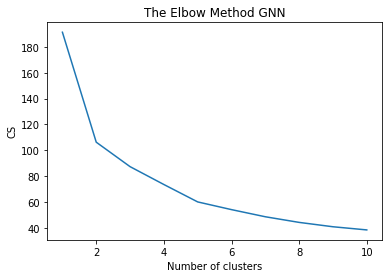

In [69]:
df_gnn,y_gnn,X_gnn = load_data(df_gnn)
k_means_elbow_method(X_gnn,'GNN')

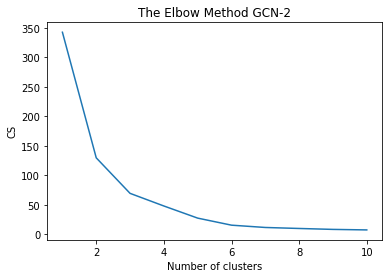

In [71]:
df_gcn_2,y_gcn_2,X_gcn_2 = load_data(df_gcn_2)
k_means_elbow_method(X_gcn_2,'GCN-2')

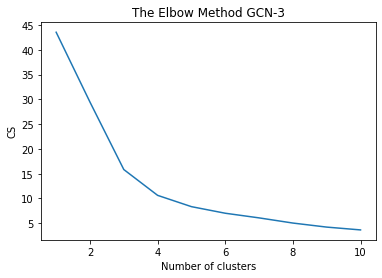

In [70]:
df_gcn_3,y_gcn_3,X_gcn_3 = load_data(df_gcn_3)
k_means_elbow_method(X_gcn_3,'GCN-3')

## K Means Clustering

In [77]:
def k_means_clustering(nclusters,X):
  kmeans = KMeans(n_clusters=nclusters, random_state=0) 
  kmeans.fit(X)
  kmeans.cluster_centers_
  print(kmeans.inertia_)
  return kmeans.labels_

In [100]:
def make_df(labels,y,name):
  df = pd.DataFrame({'node-value':y, 'cluster-label':labels})
  df['drug'] = df2['nodes']
  df = df.sort_values('cluster-label')
  fileName = '/content/drive/MyDrive/Thesis_5_1/data/drug-clusters-30-09-22' + name
  df.to_csv(fileName)
  return df

In [80]:
labels_gnn = k_means_clustering(5,X_gnn)
labels_gcn_2 = k_means_clustering(6,X_gcn_2)
labels_gcn_3 = k_means_clustering(4,X_gcn_3)

60.201614577060624
15.35193096387342
10.628002843002843


In [102]:
df_new_gnn = make_df(labels_gnn,y_gnn,'-GNN-5.csv')
df_new_gcn_2 = make_df(labels_gcn_2,y_gcn_2,'-GCN-2L-6.csv')
df_new_gcn_3 = make_df(labels_gcn_3,y_gcn_3,'-GCN-3L-4.csv')

In [97]:
print("GNN")
cm = sns.light_palette("seagreen", as_cmap=True)
df_new_gnn["cluster-label"].value_counts(dropna=False).to_frame().style.background_gradient(cmap=cm)

GNN


,cluster-label
2,107
0,103
1,2
3,1
4,1


In [98]:
print("GCN-2-Layer")
cm = sns.light_palette("seagreen", as_cmap=True)
df_new_gcn_2["cluster-label"].value_counts(dropna=False).to_frame().style.background_gradient(cmap=cm)

GCN-2-Layer


,cluster-label
5,94
0,93
1,12
2,11
3,3
4,1


In [99]:
print("GCN-3-Layer")
cm = sns.light_palette("seagreen", as_cmap=True)
df_new_gcn_3["cluster-label"].value_counts(dropna=False).to_frame().style.background_gradient(cmap=cm)

GCN-3-Layer


,cluster-label
2,103
0,99
3,11
1,1


## Hierarchial Clustering 

In [30]:
X_gnn = df_gnn.drop('nodes',axis=1)

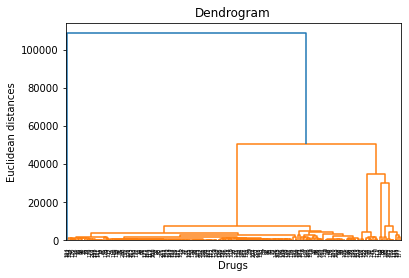

In [31]:
import scipy.cluster.hierarchy as sch # importing scipy.cluster.hierarchy for dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete')) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram') # title of the dendrogram
plt.xlabel('Drugs') # label of the x-axis
plt.ylabel('Euclidean distances') # label of the y-axis
plt.show() # show the dendrogram

In [43]:
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
clustering_model.fit(X)
clustering_model.labels_

array([0, 2, 2, 2, 5, 3, 4, 2, 8, 2, 5, 2, 2, 3, 3, 2, 3, 2, 5, 3, 4, 3,
       0, 8, 8, 2, 3, 2, 0, 3, 2, 3, 2, 3, 2, 2, 5, 3, 4, 2, 2, 2, 2, 2,
       5, 3, 4, 3, 3, 3, 2, 2, 2, 8, 2, 3, 2, 3, 6, 8, 6, 2, 2, 3, 2, 3,
       4, 3, 8, 9, 0, 0, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 8,
       9, 2, 2, 5, 2, 2, 5, 2, 3, 0, 8, 1, 8, 2, 2, 2, 2, 3, 8, 3, 2, 3,
       2, 0, 2, 0, 3, 2, 8, 2, 9, 2, 3, 2, 2, 8, 2, 2, 3, 1, 4, 3, 0, 1,
       6, 5, 4, 2, 2, 2, 5, 2, 3, 3, 2, 2, 1, 2, 3, 3, 2, 3, 4, 2, 2, 2,
       2, 2, 3, 6, 2, 5, 2, 0, 3, 2, 4, 2, 4, 3, 3, 2, 2, 3, 2, 3, 2, 2,
       2, 1, 3, 3, 3, 1, 2, 2, 3, 0, 2, 5, 8, 5, 2, 0, 3, 5, 7, 2, 3, 2,
       2, 4, 8, 6, 2, 2, 2, 2, 2, 2, 3, 5, 4, 2, 2, 3])

In [44]:
df_agglo = pd.DataFrame({'node-value':y, 'cluster-label':clustering_model.labels_})

In [45]:
cm = sns.light_palette("seagreen", as_cmap=True)
df_agglo["cluster-label"].value_counts(dropna=False).to_frame().style.background_gradient(cmap=cm)

,cluster-label
2,93
3,54
5,14
8,14
0,12
4,12
1,6
6,5
9,3
7,1
